In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
%matplotlib inline
import train_util
import util
%load_ext autoreload
%autoreload 2

from keras.models import load_model

/root/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
X, X_feat, Y, Y_no_sult = train_util.get_data(size=(128, 128, 3))

100%|██████████| 3887/3887 [00:33<00:00, 117.49it/s]


In [4]:
model = load_model('./log/2018_0727_2358/best_weights.hdf5', custom_objects={
    'mean_iou': train_util.mean_iou, 
    'dice_p_bce':train_util.dice_p_bce, 
    'dice_coef':train_util.dice_coef,
    'true_positive_rate':train_util.true_positive_rate,
})

In [5]:
from sklearn.cross_validation import train_test_split
x_train, x_test, x_feat_train, x_feat_test, y_train, y_test = train_test_split(X, X_feat, Y, test_size=0.1, random_state=43)
x_feat_train, x_feat_test = train_util.norm_X_feat(x_feat_train, x_feat_test)
preds_train_test = model.predict(([x_test ,x_feat_test]), verbose=1)
# pred= model.predict(([X,X_feat]), verbose=1)

ResourceExhaustedError: OOM when allocating tensor with shape[32,64,1]
	 [[Node: repeat_vector_1/Tile = Tile[T=DT_FLOAT, Tmultiples=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](repeat_vector_1/ExpandDims, repeat_vector_1/stack)]]
	 [[Node: conv2d_14/Sigmoid/_1401 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_528_conv2d_14/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'repeat_vector_1/Tile', defined at:
  File "/root/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/root/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/root/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-20a908bc0190>", line 5, in <module>
    'true_positive_rate':train_util.true_positive_rate,
  File "/root/anaconda3/lib/python3.5/site-packages/keras/models.py", line 243, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/root/anaconda3/lib/python3.5/site-packages/keras/models.py", line 317, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/root/anaconda3/lib/python3.5/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/root/anaconda3/lib/python3.5/site-packages/keras/utils/generic_utils.py", line 144, in deserialize_keras_object
    list(custom_objects.items())))
  File "/root/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 2524, in from_config
    process_node(layer, node_data)
  File "/root/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 2481, in process_node
    layer(input_tensors[0], **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/keras/layers/core.py", line 534, in call
    return K.repeat(inputs, self.n)
  File "/root/anaconda3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 2044, in repeat
    return tf.tile(x, pattern)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5621, in tile
    "Tile", input=input, multiples=multiples, name=name)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[32,64,1]
	 [[Node: repeat_vector_1/Tile = Tile[T=DT_FLOAT, Tmultiples=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](repeat_vector_1/ExpandDims, repeat_vector_1/stack)]]
	 [[Node: conv2d_14/Sigmoid/_1401 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_528_conv2d_14/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


/root/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


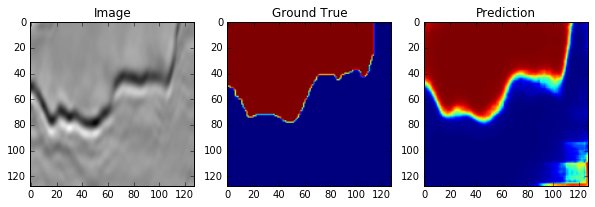

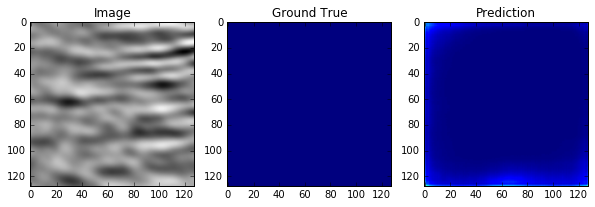

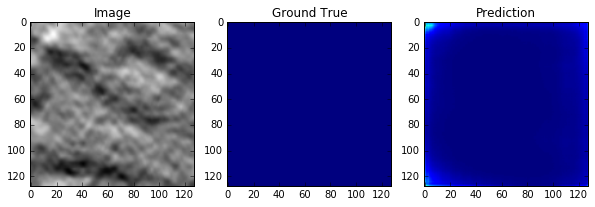

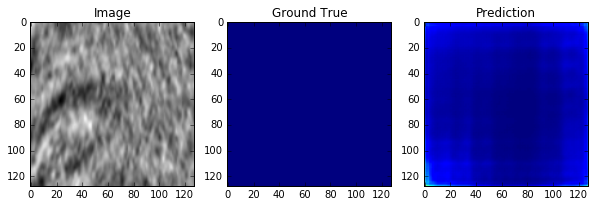

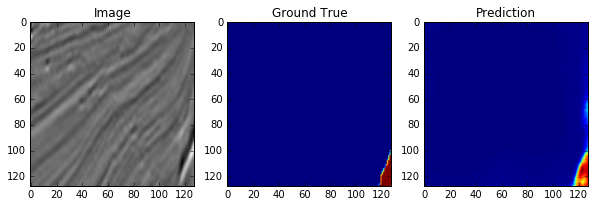

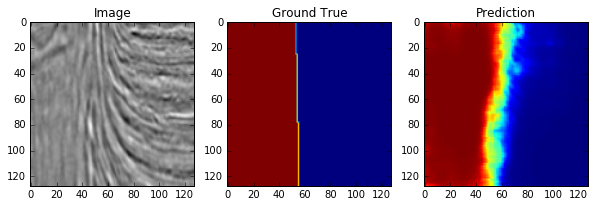

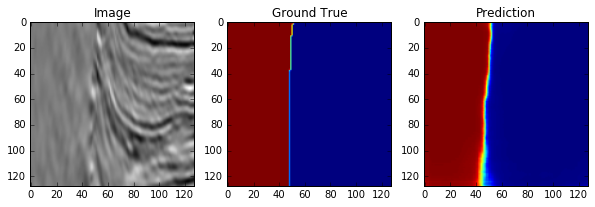

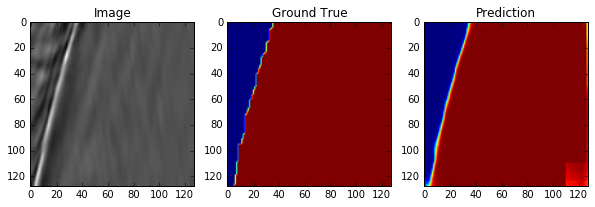

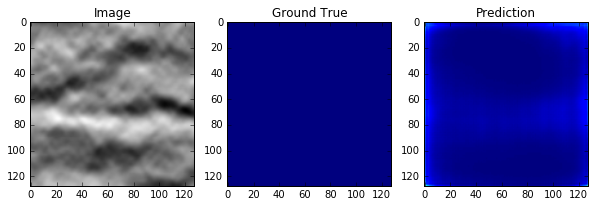

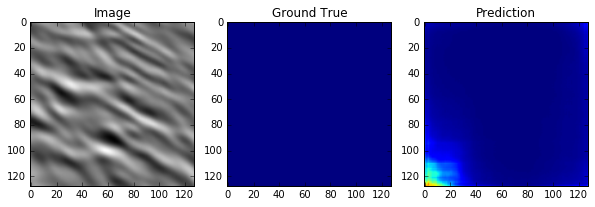

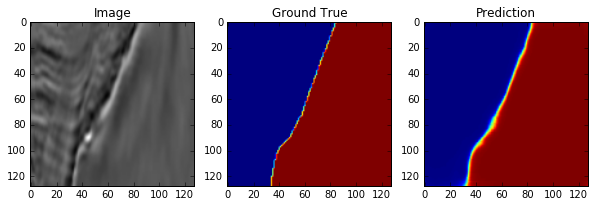

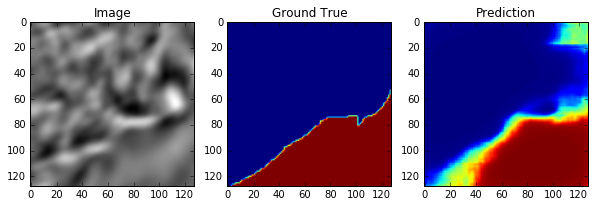

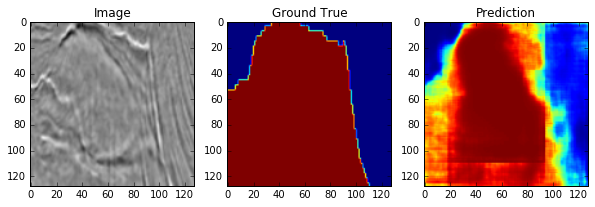

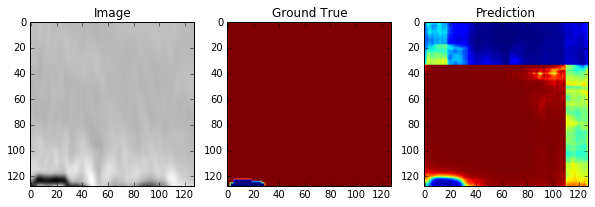

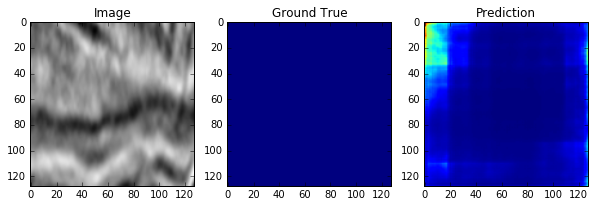

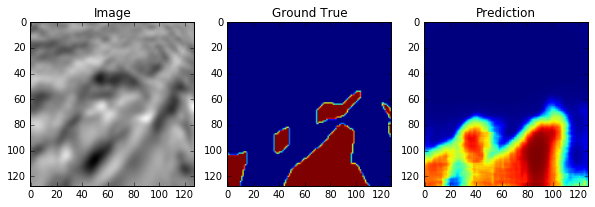

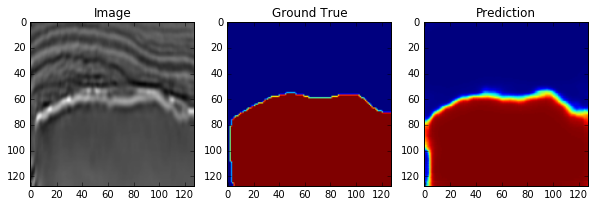

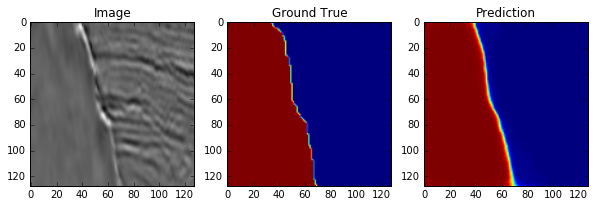

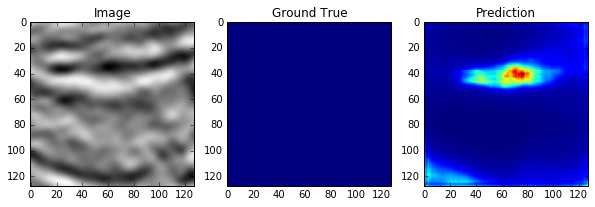

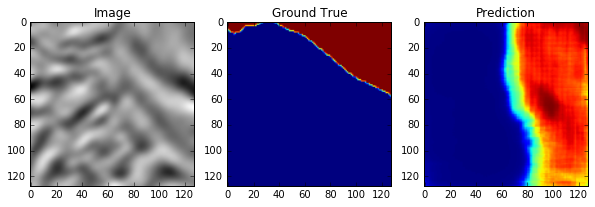

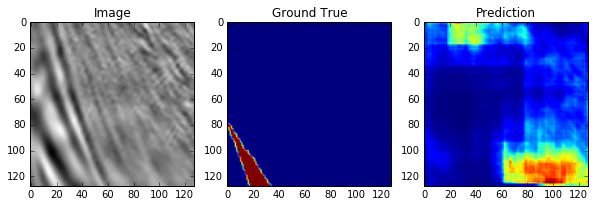

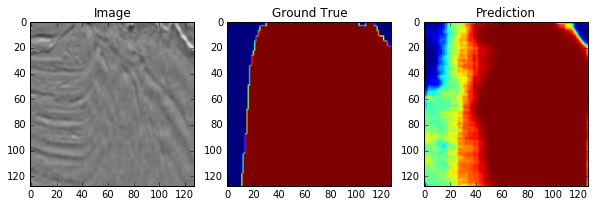

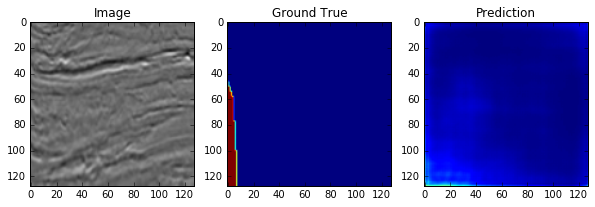

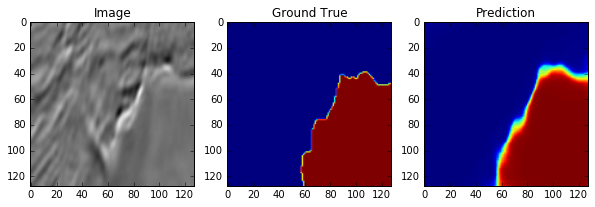

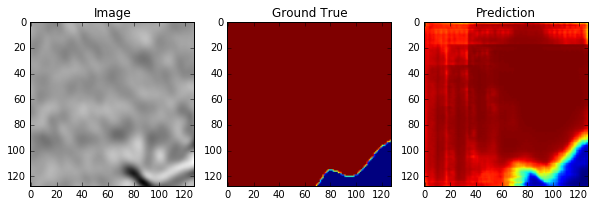

In [6]:
util.show_true_pred(X, Y, pred, row=25)

In [12]:
import random

In [15]:
random.sample(range(10), 10)

[8, 5, 0, 6, 1, 4, 7, 9, 3, 2]

In [4]:
import numpy as np
np.arange(0.5, 1.0, 0.05)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [5]:
a = []
a.append(1)

In [7]:
a.append(1)

In [8]:
a

[1, 1]

In [4]:
from image_generator import Generator

In [5]:
import pandas as pd
master_df = pd.read_csv('./data/depth_prop_cls_bad_mask.csv')
id_depth_df = master_df[['id', 'z']].set_index('id')['z']
depth_dict = id_depth_df.to_dict()
train_val_df = master_df[(master_df['data_type'] == 'train')]
ids = train_val_df['id'].values
classes = train_val_df['salt_propotion_class'].values
from sklearn.cross_validation import train_test_split
train_ids, val_ids = train_test_split(ids, test_size=0.2, random_state=43, stratify=classes)
batch_size = 32
gen = Generator(train_ids = train_ids, depth_dict=depth_dict, val_ids=val_ids, batch_size=batch_size)

In [6]:
b = next(gen.generate(False))

In [7]:
y_true = b[1]

In [1]:
from keras.models  import load_model
import train_util
model = load_model('./log/2018_0808_1149/best_weights.hdf5', custom_objects={
    'mean_iou': train_util.mean_iou, 
    'dice_p_bce':train_util.dice_p_bce, 
    'dice_coef':train_util.dice_coef,
    'true_positive_rate':train_util.true_positive_rate,
    'iou_coef': train_util.iou_coef
})

/root/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
import numpy as np
y_pred = model.predict([b[0][0], np.array(b[0][1])])
# train_util.iou_coef()

In [11]:
iou = train_util.iou_coef(y_true, y_pred)

In [23]:
from keras import backend as K
prec_list = []
for t in np.arange(0.5, 1.0, 0.05):
    prec = K.mean(K.cast(K.greater(iou, t), K.floatx()))
    prec_list.append(prec)
result = K.mean(K.stack(prec_list), axis=0)

In [24]:
K.eval(result)

0.63125

In [14]:
np.mean(K.eval(iou))

0.6729201